In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de Subset Sum
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **densidad-alta**: Son instancias con n = 1..200 y con densidad alta, es decir, los números de S son altos en comparación con W.
2. **densidad-baja**: Son instancias con n = 1..200 y con densidad baja, o sea, se necesitan muchos números de S para sumar W.
3. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
4. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
5. **dinamica**: Instancias con n y w variando para probar el algoritmo de PD.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-B**: Backtracking solamente con poda por optimalidad.
- **DP**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [84]:
df_resultados = pd.read_csv("..\\results\\resultado.csv");
df_resultados.head()

,dataset,negocios,C,i,metodo,tiempo,nodos_promedio
0,tolerancia-alta,1,253,1,FB,0.0,3.0
1,tolerancia-alta,1,394,2,FB,0.0,3.0
2,tolerancia-alta,1,360,3,FB,0.0,3.0
3,tolerancia-alta,1,412,4,FB,0.0,3.0
4,tolerancia-alta,1,370,5,FB,0.0,3.0


In [85]:
agg_funcs_dp = {"tiempo":"mean","nodos_promedio":"mean"}
agg_funcs = {"C":"mean","tiempo":"mean","nodos_promedio":"mean"}
df_resultados_dp = df_resultados.copy().groupby(['dataset','negocios','C','metodo']).aggregate(agg_funcs_dp).reset_index()
df_resultados = df_resultados.groupby(['dataset','negocios','metodo']).aggregate(agg_funcs).reset_index()
df_resultados[(df_resultados["metodo"]=="FB")]

,dataset,negocios,metodo,C,tiempo,nodos_promedio
20197,tolerancia-alta,1,FB,248.200000,0.000000,3.0
20204,tolerancia-alta,2,FB,521.000000,0.000000,5.0
20211,tolerancia-alta,3,FB,742.966667,0.000000,9.0
20218,tolerancia-alta,4,FB,978.600000,0.000000,15.0
20225,tolerancia-alta,5,FB,1199.300000,0.000000,25.0
...,...,...,...,...,...,...
20994,tolerancia-baja,30,FB,510.700000,13.974000,4356617.0
21001,tolerancia-baja,31,FB,491.266667,19.820667,7049155.0
21008,tolerancia-baja,32,FB,514.700000,31.593433,11405773.0
21015,tolerancia-baja,33,FB,496.400000,52.493667,18454929.0


## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB con los datasets densidad-alta y densidad-baja. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales.

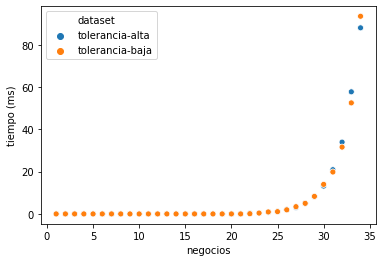

In [86]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB")].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='negocios', y='tiempo', hue='dataset');
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\FB-tolerancias.svg");

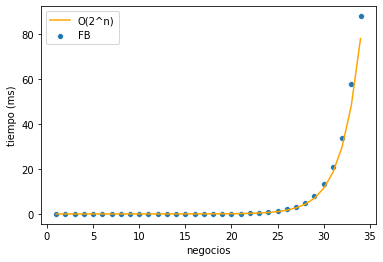

In [87]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="tolerancia-alta")].copy();
df_complejidad_FB["tiempo_esperado"] = 1.619 ** df_complejidad_FB["negocios"] * 0.000006; # Exponencial
#df_complejidad_FB["tiempo_esperado"] = 2.0 ** df_complejidad_FB["negocios"] * 0.000000005; # Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='negocios', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='negocios', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\FB-complexity.svg");

Índice de correlación de Pearson: 0.99962667187462


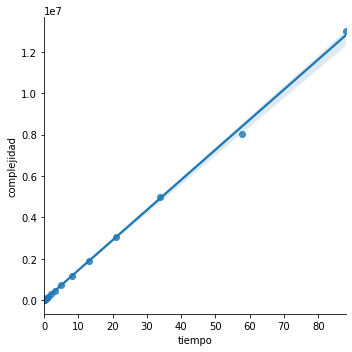

In [88]:
# correlacion entre tiempo y complejidad
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="tolerancia-alta")].copy();
df_complejidad_FB["complejidad"] = 1.619 ** df_complejidad_FB["negocios"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("..\\graphs\\FB-correlacion-tiempo.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.9999998257208387


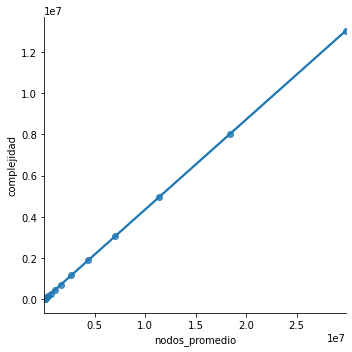

In [89]:
# correlacion entre nodos_promedio recorridos y complejidad
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="tolerancia-alta")].copy();
df_complejidad_FB["complejidad"] = 1.619 ** df_complejidad_FB["negocios"];
fig = sns.lmplot(data=df_complejidad_FB, x="nodos_promedio", y="complejidad");
plt.savefig("..\\graphs\\FB-correlacion-nodos-promedio.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "nodos_promedio", "complejidad"));

## Experimento 2: Complejidad de Backtracking
En este experimento evaluamos el método BT con los datasets mejor-caso-bt y peor-caso-bt. La hipótesis es que va a tener un comportamiento exponencial en el peor caso y lineal en el mejor caso.

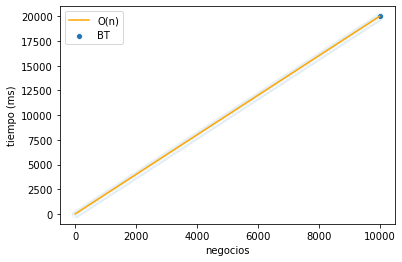

In [90]:

df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "BT-mejor-fact")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["negocios"] * 2; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='negocios', y='nodos_promedio');
fig = sns.lineplot(data=df_BT_mejor_caso, x='negocios', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\complejidad-BT-mejor-fact.svg");

Índice de correlación de Pearson: 0.9999999849999999


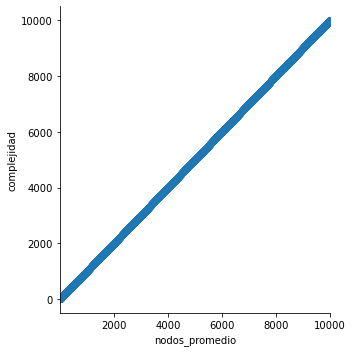

In [91]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT-O1") & (df_resultados["dataset"] == "BT-mejor-opt")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["negocios"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="nodos_promedio", y="complejidad");
plt.savefig("..\\graphs\\correlacion-BT-mejor-opt1   t.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "nodos_promedio", "complejidad"));

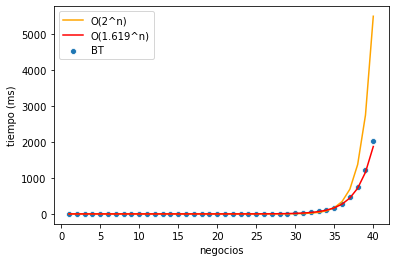

In [92]:
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "BT-peor-fact")].copy();
df_BT_peor_caso["tiempo_esperado_exp2"] = 2 ** df_BT_peor_caso["negocios"] * 0.000000005; # Exponencial.
df_BT_peor_caso["tiempo_esperado_exp1.619"] = 1.619 ** df_BT_peor_caso["negocios"] * 0.000008; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='negocios', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='negocios', y='tiempo_esperado_exp2', color="orange");
fig = sns.lineplot(data=df_BT_peor_caso, x='negocios', y='tiempo_esperado_exp1.619', color="red");
fig.legend(labels=['O(2^n)','O(1.619^n)','BT']);
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\BT-complexity.svg");

Índice de correlación de Pearson: 0.999904191237532


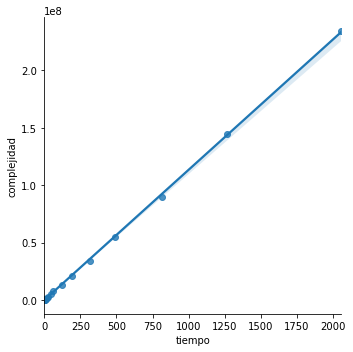

In [93]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT-O1") & (df_resultados["dataset"] == "BT-peor-opt")].copy();
df_BT_peor_caso["complejidad"] = 1.619 ** df_BT_peor_caso["negocios"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("..\\graphs\\correlacion-BT-peor-opt1.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

## Experimento 3: Análisis de las podas
Analizar Backtracking con y sin las podas para distintas densidades.

### Resultados con tolerancia-alta

#### Graficamos las comparaciones de los tiempos

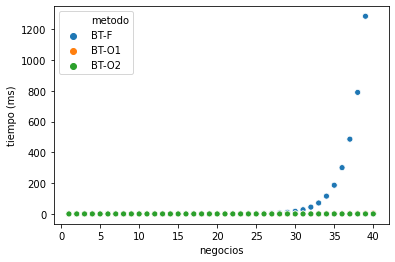

In [94]:
df_BT_tolerancia_alta = df_resultados[((df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O1") | (df_resultados["metodo"]=="BT-O2")) & (df_resultados["dataset"] == "tolerancia-alta")].copy();
df_BT_tolerancia_alta = df_BT_tolerancia_alta[df_BT_tolerancia_alta["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_tolerancia_alta, x='negocios', y='tiempo', hue='metodo');
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\BT-tolerancia-alta-podas-tiempo.svg");

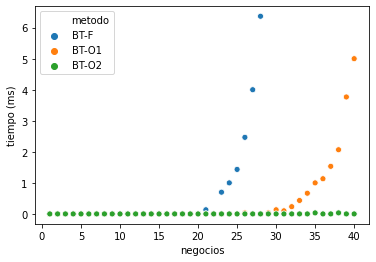

In [95]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_tolerancia_alta[df_BT_tolerancia_alta["tiempo"]<10], x='negocios', y='tiempo', hue='metodo');
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\BT-tolerancia-alta-podas-tiempo-zoom.svg");

#### Graficamos las comparaciones del promedio de los nodos recorridos

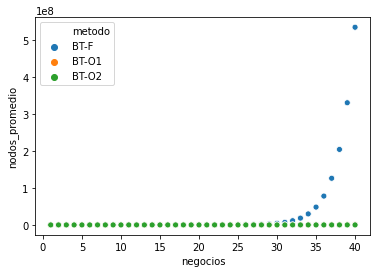

In [96]:
df_BT_tolerancia_alta = df_resultados[((df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O1") | (df_resultados["metodo"]=="BT-O2")) & (df_resultados["dataset"] == "tolerancia-alta")].copy();
fig = sns.scatterplot(data=df_BT_tolerancia_alta, x='negocios', y='nodos_promedio', hue='metodo');
fig.set(xlabel='negocios', ylabel='nodos_promedio');
plt.savefig("..\\graphs\\BT-tolerancia-alta-podas-nodos-promedio.svg");

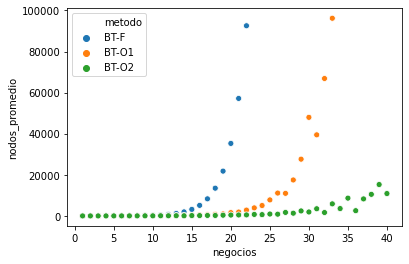

In [97]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_tolerancia_alta[df_BT_tolerancia_alta["nodos_promedio"]<1e5], x='negocios', y='nodos_promedio', hue='metodo');
fig.set(xlabel='negocios', ylabel='nodos_promedio');
plt.savefig("..\\graphs\\BT-tolerancia-alta-podas-nodos-promedio-zoom.svg");

### Resultados con tolerancia-baja

#### Graficamos las comparaciones de los tiempos

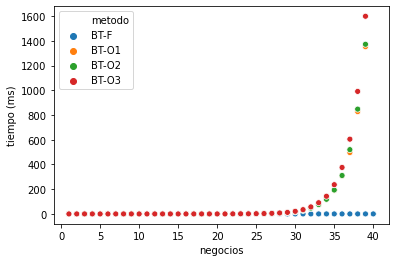

In [98]:
df_BT_tolerancia_baja = df_resultados[((df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O1") | (df_resultados["metodo"]=="BT-O2") | (df_resultados["metodo"]=="BT-O3")) & (df_resultados["dataset"] == "tolerancia-baja")].copy();
df_BT_tolerancia_baja = df_BT_tolerancia_baja[df_BT_tolerancia_baja["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_tolerancia_baja, x='negocios', y='tiempo', hue='metodo');
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\BT-tolerancia-baja-podas-tiempo.svg");

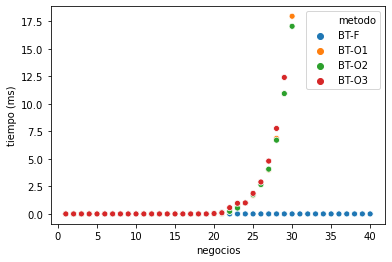

In [99]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_tolerancia_baja[df_BT_tolerancia_baja["tiempo"]<20], x='negocios', y='tiempo', hue='metodo');
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\BT-tolerancia-baja-podas-tiempo-zoom.svg");

#### Graficamos las comparaciones del promedio de los nodos recorridos

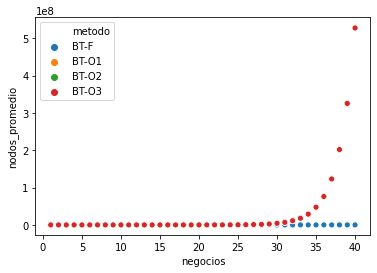

In [100]:
df_BT_tolerancia_baja = df_resultados[((df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O1") | (df_resultados["metodo"]=="BT-O2") | (df_resultados["metodo"]=="BT-O3")) & (df_resultados["dataset"] == "tolerancia-baja")].copy();
fig = sns.scatterplot(data=df_BT_tolerancia_baja, x='negocios', y='nodos_promedio', hue='metodo');
fig.set(xlabel='negocios', ylabel='nodos_promedio');
plt.savefig("..\\graphs\\BT-tolerancia-baja-podas-nodos-promedio.svg");

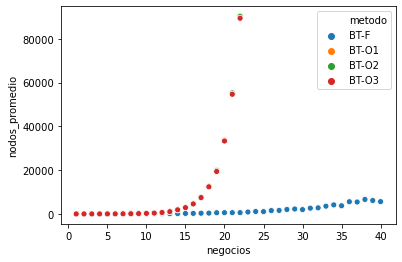

In [101]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_tolerancia_baja[df_BT_tolerancia_baja["nodos_promedio"]<1e5], x='negocios', y='nodos_promedio', hue='metodo');
fig.set(xlabel='negocios', ylabel='nodos_promedio');
plt.savefig("..\\graphs\\BT-tolerancia-baja-podas-nodos-promedio-zoom.svg");

#### Comparacion de las tres podas por optimalidad

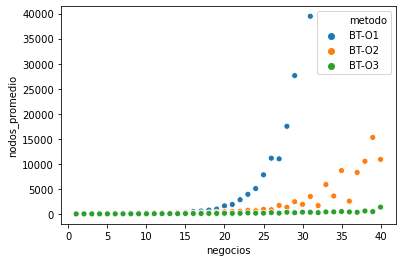

In [102]:
df_BT_tolerancia_alta_nodos = df_resultados[((df_resultados["metodo"]=="BT-O1") | (df_resultados["metodo"]=="BT-O2") | (df_resultados["metodo"]=="BT-O3")) & (df_resultados["dataset"] == "tolerancia-alta")].copy();
df_BT_tolerancia_alta_nodos = df_BT_tolerancia_alta_nodos[(df_BT_tolerancia_alta_nodos["nodos_promedio"]<40000)]
fig = sns.scatterplot(data=df_BT_tolerancia_alta_nodos, x='negocios', y='nodos_promedio', hue='metodo');
fig.set(xlabel='negocios', ylabel='nodos_promedio');
plt.savefig("..\\graphs\\BT-comparacion-podas-opt.svg");

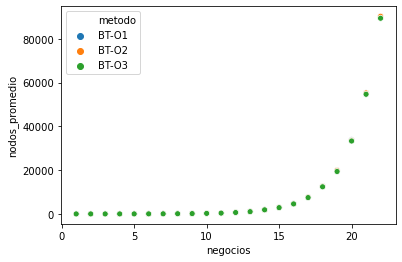

In [103]:
df_BT_tolerancia_baja_nodos = df_resultados[((df_resultados["metodo"]=="BT-O1") | (df_resultados["metodo"]=="BT-O2") | (df_resultados["metodo"]=="BT-O3")) & (df_resultados["dataset"] == "tolerancia-baja")].copy();
fig = sns.scatterplot(data=df_BT_tolerancia_baja_nodos[df_BT_tolerancia_baja_nodos["nodos_promedio"]<1e5], x='negocios', y='nodos_promedio', hue='metodo');
fig.set(xlabel='negocios', ylabel='nodos_promedio');
plt.savefig("..\\graphs\\BT-comparacion-podas-opt-zoom.svg");

# Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

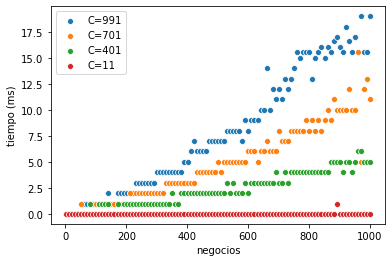

In [104]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados_dp[(df_resultados_dp["metodo"]=="DP") & (df_resultados_dp["dataset"]=="DP")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["C"]==991], x='negocios', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["C"]==701], x='negocios', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["C"]==401], x='negocios', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["C"]==11], x='negocios', y='tiempo');
fig.legend(labels=['C=991','C=701','C=401','C=11']);
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\dp-n-tiempo.svg");

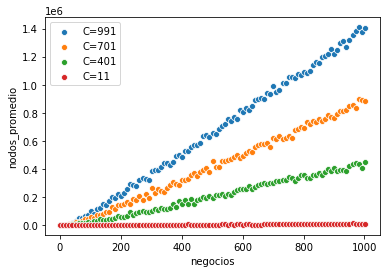

In [105]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados_dp[(df_resultados_dp["metodo"]=="DP") & (df_resultados_dp["dataset"]=="DP")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["C"]==991], x='negocios', y='nodos_promedio');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["C"]==701], x='negocios', y='nodos_promedio');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["C"]==401], x='negocios', y='nodos_promedio');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["C"]==11], x='negocios', y='nodos_promedio');
fig.legend(labels=['C=991','C=701','C=401','C=11']);
fig.set(xlabel='negocios', ylabel='nodos_promedio');
plt.savefig("..\\graphs\\dp-n-nodos-promedio.svg");

In [106]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
#df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
#fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='W', y='tiempo');
#fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='W', y='tiempo');
#fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='W', y='tiempo');
#fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='W', y='tiempo');
#fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
#fig.set(xlabel='W', ylabel='tiempo (ms)');
#plt.savefig("graficos/dp-W.svg");

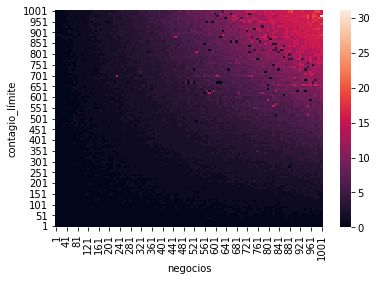

In [107]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados_dp[(df_resultados_dp["metodo"]=="DP") & (df_resultados_dp["dataset"]=="DP")].copy();
df_heatmap = df_dinamica.pivot_table(index='negocios', columns='C', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
fig.set(xlabel='negocios', ylabel='tiempo');
fig.set(xlabel='negocios', ylabel='contagio_límite');
plt.savefig("..\\graphs\\DP-heatmap-tiempo.svg");

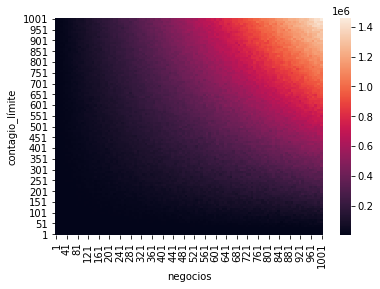

In [108]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados_dp[(df_resultados_dp["metodo"]=="DP") & (df_resultados_dp["dataset"]=="DP")].copy();
df_heatmap = df_dinamica.pivot_table(index='negocios', columns='C', values='nodos_promedio', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
fig.set(xlabel='negocios', ylabel='nodos_promedio');
fig.set(xlabel='negocios', ylabel='contagio_límite');
plt.savefig("..\\graphs\\DP-heatmap-nodos-promedio.svg");

Índice de correlación de Pearson: 0.9592549652421368


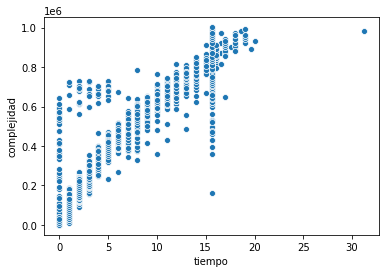

In [109]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados_dp[(df_resultados_dp["metodo"]=="DP") & (df_resultados_dp["dataset"]=="DP")].copy();
df_dinamica["complejidad"] = df_dinamica["negocios"] * df_dinamica["C"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("..\\graphs\\dp-correlacion-tiempo.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.9950729001076956


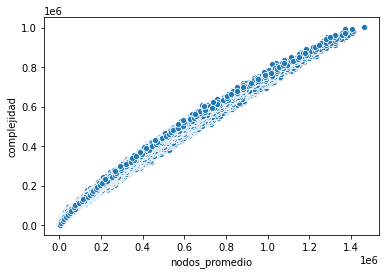

In [110]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados_dp[(df_resultados_dp["metodo"]=="DP") & (df_resultados_dp["dataset"]=="DP")].copy();
df_dinamica["complejidad"] = df_dinamica["negocios"] * df_dinamica["C"];
fig = sns.scatterplot(data=df_dinamica, x="nodos_promedio", y="complejidad");
plt.savefig("..\\graphs\\dp-correlacion-nodos-promedio.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "nodos_promedio", "complejidad"));

## Experimento 5: Comparación Backtacking y Programación Dinámica
En este experimento se trata de buscar para qué casos funciona mejor cada técnica. Por ejemplo, vamos a ejecutar BT y Dinámica sobre los datasets tolerancia-alta y tolerancia-baja.

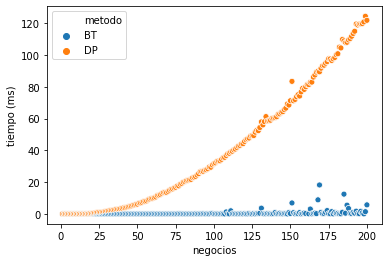

In [111]:
df_tolerancia_alta = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "tolerancia-alta")].copy();
df_tolerancia_alta = df_tolerancia_alta[(df_tolerancia_alta["nodos_promedio"]<1e8)]
fig = sns.scatterplot(data=df_tolerancia_alta, x='negocios', y='tiempo', hue='metodo');
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\comparacion-bt-dp-alta-tiempo.svg");

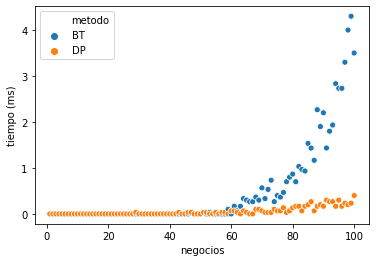

In [112]:
df_tolerancia_baja = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "tolerancia-baja")].copy();
#df_densidad_baja = df_densidad_baja[df_densidad_baja["negocios"]<=30];
fig = sns.scatterplot(data=df_tolerancia_baja, x='negocios', y='tiempo', hue='metodo');
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\comparacion-bt-dp-baja-tiempo.svg");

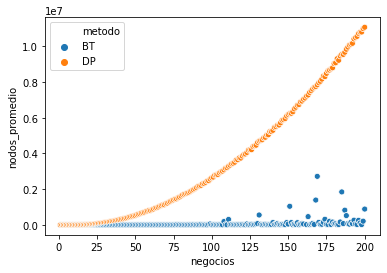

In [113]:
df_tolerancia_alta = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "tolerancia-alta")].copy();
df_tolerancia_alta = df_tolerancia_alta[(df_tolerancia_alta["nodos_promedio"]<1e8)]
fig = sns.scatterplot(data=df_tolerancia_alta, x='negocios', y='nodos_promedio', hue='metodo');
fig.set(xlabel='negocios', ylabel='nodos_promedio');
plt.savefig("..\\graphs\\comparacion-bt-dp-alta-nodos-promedio.svg");

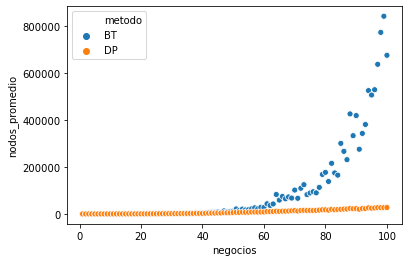

In [114]:
df_tolerancia_baja = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "tolerancia-baja")].copy();
#df_densidad_baja = df_densidad_baja[df_densidad_baja["negocios"]<=30];
fig = sns.scatterplot(data=df_tolerancia_baja, x='negocios', y='nodos_promedio', hue='metodo');
fig.set(xlabel='negocios', ylabel='nodos_promedio');
plt.savefig("..\\graphs\\comparacion-bt-dp-baja.svg");

,dataset,negocios,C,metodo,tiempo,nodos_promedio
20080,DP,1,1,BT,0.000,3.0
20082,DP,1,11,BT,0.000,3.0
20084,DP,1,21,BT,0.000,3.0
20086,DP,1,31,BT,0.000,3.0
20088,DP,1,41,BT,0.000,3.0
...,...,...,...,...,...,...
22070,DP,91,861,BT,61.004,11626615.0
22072,DP,91,871,BT,37.002,6814255.0
22074,DP,91,881,BT,35.002,6706573.0
22076,DP,91,891,BT,64.004,12432449.0


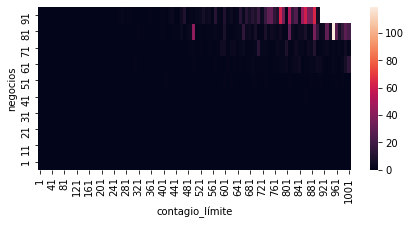

In [115]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados_dp[(df_resultados_dp["metodo"]=="BT") & (df_resultados_dp["dataset"]=="DP")].copy();
df_heatmap = df_dinamica.pivot_table(index='negocios', columns='C', values='tiempo', aggfunc=np.mean);
plt.figure(figsize=(7, 3))
fig = sns.heatmap(df_heatmap);
fig.set(ylabel='negocios', xlabel='contagio_límite');
fig.invert_yaxis();
plt.savefig("..\\graphs\\BT-heatmap-tiempo.svg");
df_dinamica

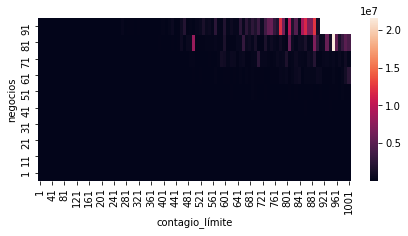

In [116]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados_dp[(df_resultados_dp["metodo"]=="BT") & (df_resultados_dp["dataset"]=="DP")].copy();
df_heatmap = df_dinamica.pivot_table(index='negocios', columns='C', values='nodos_promedio', aggfunc=np.mean);
plt.figure(figsize=(7, 3))
fig = sns.heatmap(df_heatmap);
fig.set(ylabel='negocios', xlabel='contagio_límite');
fig.invert_yaxis();
plt.savefig("..\\graphs\\BT-heatmap-nodos-promedio.svg");